Using device: cuda:0
Epoch [10/400], Accuracy: 0.50
Epoch [20/400], Accuracy: 0.62
Epoch [30/400], Accuracy: 0.69
Epoch [40/400], Accuracy: 0.71
Epoch [50/400], Accuracy: 0.73
Epoch [60/400], Accuracy: 0.75
Epoch [70/400], Accuracy: 0.77
Epoch [80/400], Accuracy: 0.78
Epoch [90/400], Accuracy: 0.78
Epoch [100/400], Accuracy: 0.79


/home/kh/app/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/datasets/_openml.py:303: UserWarning: Multiple active versions of the dataset matching the name vehicle exist. Versions may be fundamentally different, returning version 1.
  warn(
/home/kh/app/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Epoch [110/400], Accuracy: 0.80
Epoch [120/400], Accuracy: 0.82
Epoch [130/400], Accuracy: 0.82
Epoch [140/400], Accuracy: 0.83
Epoch [150/400], Accuracy: 0.84
Epoch [160/400], Accuracy: 0.84
Epoch [170/400], Accuracy: 0.85
Epoch [180/400], Accuracy: 0.84
Epoch [190/400], Accuracy: 0.83
Epoch [200/400], Accuracy: 0.85
Epoch [210/400], Accuracy: 0.85
Epoch [220/400], Accuracy: 0.85
Epoch [230/400], Accuracy: 0.86
Epoch [240/400], Accuracy: 0.87
Epoch [250/400], Accuracy: 0.86
Epoch [260/400], Accuracy: 0.85
Epoch [270/400], Accuracy: 0.86
Epoch [280/400], Accuracy: 0.86
Epoch [290/400], Accuracy: 0.87
Epoch [300/400], Accuracy: 0.87
Epoch [310/400], Accuracy: 0.87
Epoch [320/400], Accuracy: 0.87
Epoch [330/400], Accuracy: 0.87
Epoch [340/400], Accuracy: 0.86
Epoch [350/400], Accuracy: 0.87
Epoch [360/400], Accuracy: 0.86
Epoch [370/400], Accuracy: 0.86
Epoch [380/400], Accuracy: 0.86
Epoch [390/400], Accuracy: 0.86
Epoch [400/400], Accuracy: 0.86


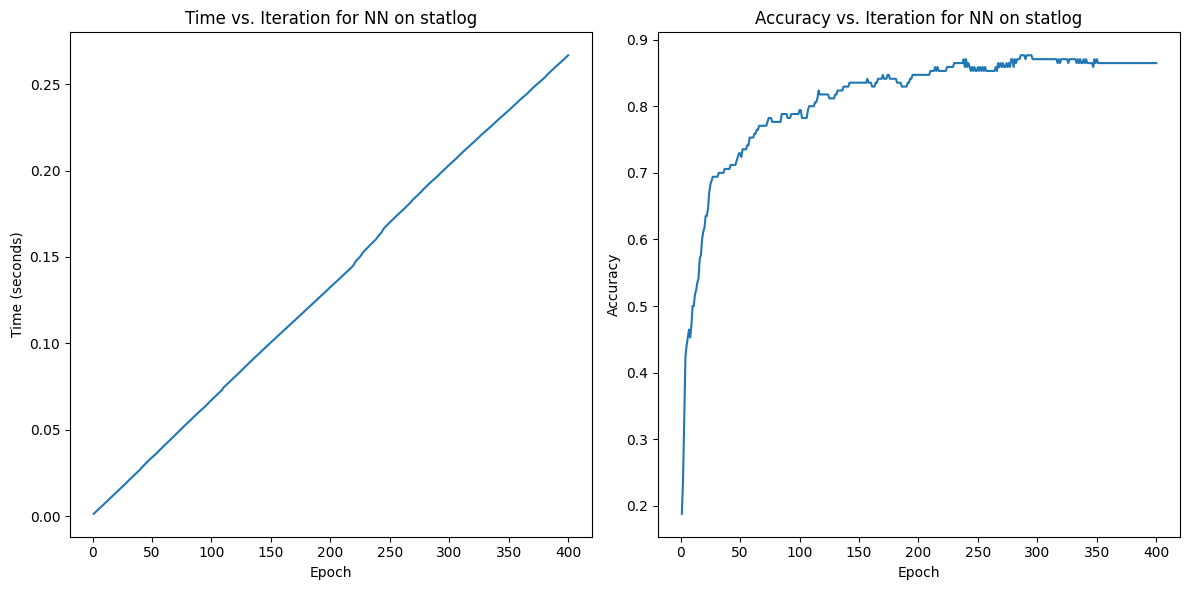

Final Accuracy: 0.86


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import fetch_openml
import time

# Check for GPU availability
device = torch.device("cuda:0")
print(f"Using device: {device}")

# Load the Statlog dataset (replace 'statlog_dataset.csv' with your dataset file)
data = fetch_openml("vehicle")

# Extract the features and labels
X = data.data
y = data.target

# Convert target labels to numeric format
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert NumPy arrays to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
X_test = torch.tensor(X_test, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train, dtype=torch.long).to(device)
y_test = torch.tensor(y_test, dtype=torch.long).to(device)

# Define a multi-class neural network model
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, num_classes)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Specify the number of classes in your dataset
num_classes = len(np.unique(y))

# Create the neural network model
model = NeuralNetwork(X_train.shape[1], num_classes).to(device)

# Define loss function and optimizer for multi-class classification
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001,weight_decay=0.0001)

# Lists to store accuracy and timing data
accuracies = []
times = []

# Train the model
num_epochs = 400
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    
    # Record the start time
    start_time = time.time()
    
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    
    # Record the end time
    end_time = time.time()
    
    # Evaluate the model on the test data
    model.eval()
    with torch.no_grad():
        outputs = model(X_test)
        predictions = torch.argmax(outputs, dim=1)
        accuracy = accuracy_score(y_test.cpu().numpy(), predictions.cpu().numpy())
        accuracies.append(accuracy)
        lasttime = times[-1] if epoch > 0 else 0
        times.append(lasttime + end_time - start_time)
    
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], Accuracy: {accuracy:.2f}")

# Plot the time vs. iteration
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), times, label="Time")
plt.xlabel("Epoch")
plt.ylabel("Time (seconds)")
plt.title("Time vs. Iteration for NN on statlog")

# Plot the accuracy vs. iteration
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), accuracies, label="Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Iteration for NN on statlog")

plt.tight_layout()
plt.show()

# Final accuracy
print(f"Final Accuracy: {accuracies[-1]:.2f}")


Using device: cuda:0
Epoch [10/400], Accuracy: 0.45
Epoch [20/400], Accuracy: 0.59
Epoch [30/400], Accuracy: 0.73
Epoch [40/400], Accuracy: 0.72
Epoch [50/400], Accuracy: 0.75
Epoch [60/400], Accuracy: 0.75
Epoch [70/400], Accuracy: 0.76
Epoch [80/400], Accuracy: 0.76


/home/kh/app/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/datasets/_openml.py:303: UserWarning: Multiple active versions of the dataset matching the name vehicle exist. Versions may be fundamentally different, returning version 1.
  warn(
/home/kh/app/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Epoch [90/400], Accuracy: 0.76
Epoch [100/400], Accuracy: 0.79
Epoch [110/400], Accuracy: 0.79
Epoch [120/400], Accuracy: 0.79
Epoch [130/400], Accuracy: 0.82
Epoch [140/400], Accuracy: 0.82
Epoch [150/400], Accuracy: 0.84
Epoch [160/400], Accuracy: 0.85
Epoch [170/400], Accuracy: 0.87
Epoch [180/400], Accuracy: 0.88
Epoch [190/400], Accuracy: 0.87
Epoch [200/400], Accuracy: 0.88
Epoch [210/400], Accuracy: 0.89
Epoch [220/400], Accuracy: 0.88
Epoch [230/400], Accuracy: 0.88
Epoch [240/400], Accuracy: 0.88
Epoch [250/400], Accuracy: 0.88
Epoch [260/400], Accuracy: 0.87
Epoch [270/400], Accuracy: 0.87
Epoch [280/400], Accuracy: 0.87
Epoch [290/400], Accuracy: 0.87
Epoch [300/400], Accuracy: 0.87
Epoch [310/400], Accuracy: 0.88
Epoch [320/400], Accuracy: 0.87
Epoch [330/400], Accuracy: 0.88
Epoch [340/400], Accuracy: 0.88
Epoch [350/400], Accuracy: 0.89
Epoch [360/400], Accuracy: 0.89
Epoch [370/400], Accuracy: 0.89
Epoch [380/400], Accuracy: 0.89
Epoch [390/400], Accuracy: 0.89
Epoch [40

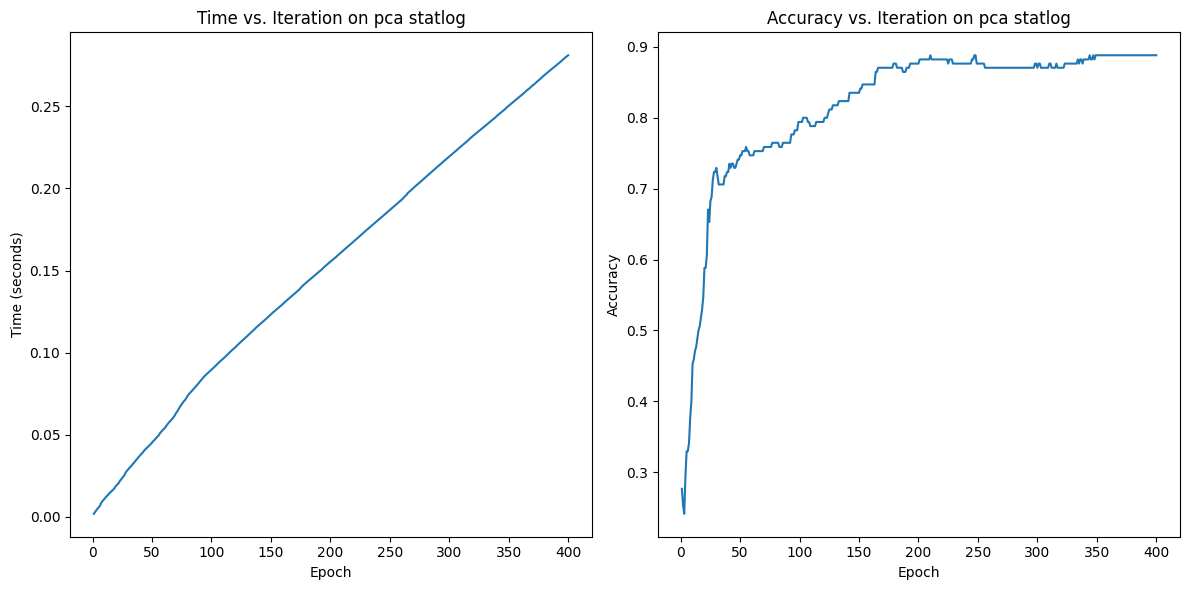

Total Training Time: 0.28 seconds
Final Accuracy: 0.89


In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import fetch_openml
import time

# Check for GPU availability
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load the Statlog dataset (replace 'statlog_dataset.csv' with your dataset file)
data = fetch_openml("vehicle")

# Extract the features and labels
X = data.data
y = data.target

# Convert target labels to numeric format
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Perform dimensionality reduction with power iteration (PCA)
from sklearn.decomposition import PCA

# Set the desired number of components
n_components = 12  # You can adjust this as needed

# Fit PCA to the training data
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Convert NumPy arrays to PyTorch tensors
X_train_pca = torch.tensor(X_train_pca, dtype=torch.float32).to(device)
X_test_pca = torch.tensor(X_test_pca, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train, dtype=torch.long).to(device)
y_test = torch.tensor(y_test, dtype=torch.long).to(device)

# Define a neural network model
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, num_classes)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Specify the number of classes in your dataset
num_classes = len(np.unique(y))

# Create the neural network model
model = NeuralNetwork(X_train_pca.shape[1], num_classes).to(device)

# Define loss function and optimizer for multi-class classification
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001,weight_decay=0.0001)

# Lists to store accuracy and timing data
accuracies = []
times = []

# Train the model
num_epochs = 400
total_training_time = 0.0  # To track the total training time
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    
    # Record the start time
    start_time = time.time()
    
    outputs = model(X_train_pca)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    
    # Record the end time
    end_time = time.time()
    
    total_training_time += end_time - start_time  # Add the epoch training time to the total
    times.append(total_training_time)
    # Evaluate the model on the test data
    model.eval()
    with torch.no_grad():
        outputs = model(X_test_pca)
        predictions = torch.argmax(outputs, dim=1)
        accuracy = accuracy_score(y_test.cpu().numpy(), predictions.cpu().numpy())
        accuracies.append(accuracy)
    
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], Accuracy: {accuracy:.2f}")

# Plot the time vs. iteration
# Plot the time vs. iteration
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
print(times)
plt.plot(range(1, num_epochs + 1), times, label="Time")
plt.xlabel("Epoch")
plt.ylabel("Time (seconds)")
plt.title("Time vs. Iteration on pca statlog")

# Plot the accuracy vs. iteration
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), accuracies, label="Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Iteration on pca statlog")

plt.tight_layout()
plt.show()

# Total training time
print(f"Total Training Time: {total_training_time:.2f} seconds")

# Final accuracy
print(f"Final Accuracy: {accuracies[-1]:.2f}")


Using device: cuda:0


/home/kh/app/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/datasets/_openml.py:303: UserWarning: Multiple active versions of the dataset matching the name vehicle exist. Versions may be fundamentally different, returning version 1.
  warn(
/home/kh/app/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Epoch [10/400], Accuracy: 0.58
Epoch [20/400], Accuracy: 0.61
Epoch [30/400], Accuracy: 0.71
Epoch [40/400], Accuracy: 0.75
Epoch [50/400], Accuracy: 0.75
Epoch [60/400], Accuracy: 0.77
Epoch [70/400], Accuracy: 0.79
Epoch [80/400], Accuracy: 0.79
Epoch [90/400], Accuracy: 0.79
Epoch [100/400], Accuracy: 0.79
Epoch [110/400], Accuracy: 0.79
Epoch [120/400], Accuracy: 0.79
Epoch [130/400], Accuracy: 0.80
Epoch [140/400], Accuracy: 0.82
Epoch [150/400], Accuracy: 0.83
Epoch [160/400], Accuracy: 0.85
Epoch [170/400], Accuracy: 0.84
Epoch [180/400], Accuracy: 0.85
Epoch [190/400], Accuracy: 0.85
Epoch [200/400], Accuracy: 0.86
Epoch [210/400], Accuracy: 0.88
Epoch [220/400], Accuracy: 0.88
Epoch [230/400], Accuracy: 0.88
Epoch [240/400], Accuracy: 0.88
Epoch [250/400], Accuracy: 0.88
Epoch [260/400], Accuracy: 0.87
Epoch [270/400], Accuracy: 0.87
Epoch [280/400], Accuracy: 0.87
Epoch [290/400], Accuracy: 0.87
Epoch [300/400], Accuracy: 0.87
Epoch [310/400], Accuracy: 0.87
Epoch [320/400], 

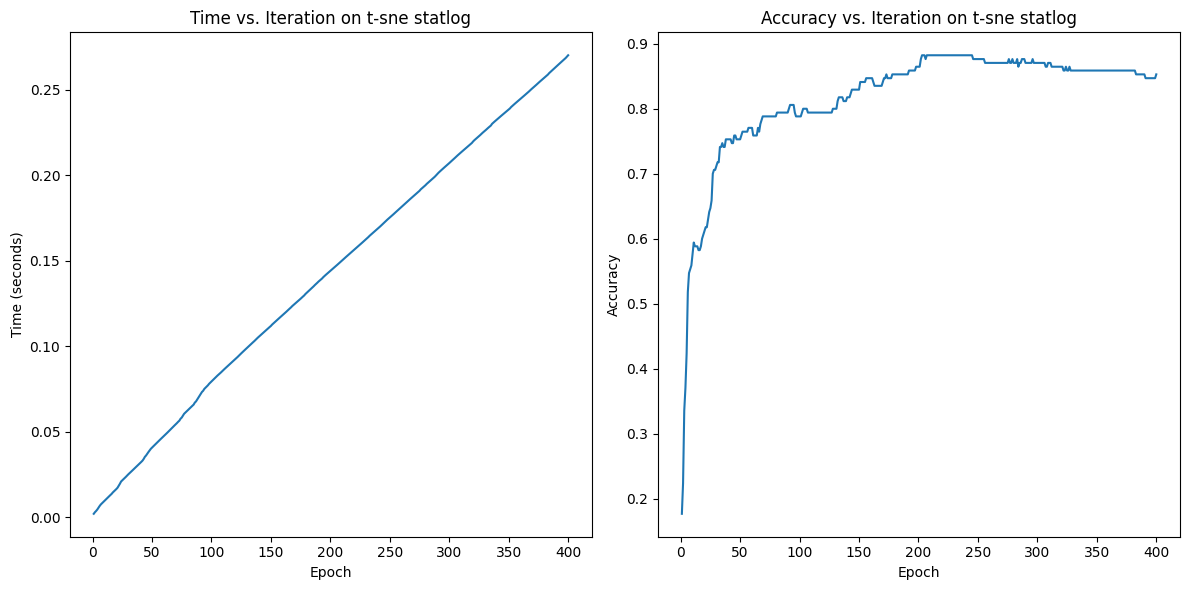

Total Training Time: 0.27 seconds
Final Accuracy: 0.85


In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import fetch_openml
from sklearn.manifold import TSNE

# Check for GPU availability
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load the Statlog dataset (replace 'statlog_dataset.csv' with your dataset file)
data = fetch_openml("vehicle")

# Extract the features and labels
X = data.data
y = data.target

# Convert target labels to numeric format
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Perform dimensionality reduction with t-SNE
n_components = 3  # Set the desired number of components (2D for visualization)
tsne = TSNE(n_components=n_components)
X_train_tsne = tsne.fit_transform(X_train)
X_test_tsne = tsne.fit_transform(X_test)  # Use transform to project the test data

# Convert NumPy arrays to PyTorch tensors
X_train_tsne = torch.tensor(X_train_tsne, dtype=torch.float32).to(device)
X_test_tsne = torch.tensor(X_test_tsne, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train, dtype=torch.long).to(device)
y_test = torch.tensor(y_test, dtype=torch.long).to(device)


# Define a neural network model
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, num_classes)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Specify the number of classes in your dataset
num_classes = len(np.unique(y))

# Create the neural network model
model = NeuralNetwork(X_train_pca.shape[1], num_classes).to(device)

# Define loss function and optimizer for multi-class classification
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001,weight_decay=0.0001)

# Lists to store accuracy and timing data
accuracies = []
times = []

# Train the model
num_epochs = 400
total_training_time = 0.0  # To track the total training time
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    
    # Record the start time
    start_time = time.time()
    
    outputs = model(X_train_pca)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    
    # Record the end time
    end_time = time.time()
    
    total_training_time += end_time - start_time  # Add the epoch training time to the total
    times.append(total_training_time)
    # Evaluate the model on the test data
    model.eval()
    with torch.no_grad():
        outputs = model(X_test_pca)
        predictions = torch.argmax(outputs, dim=1)
        accuracy = accuracy_score(y_test.cpu().numpy(), predictions.cpu().numpy())
        accuracies.append(accuracy)
    
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], Accuracy: {accuracy:.2f}")

# Plot the time vs. iteration
# Plot the time vs. iteration
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
print(times)
plt.plot(range(1, num_epochs + 1), times, label="Time")
plt.xlabel("Epoch")
plt.ylabel("Time (seconds)")
plt.title("Time vs. Iteration on t-sne statlog")

# Plot the accuracy vs. iteration
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), accuracies, label="Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Iteration on t-sne statlog")

plt.tight_layout()
plt.show()

# Total training time
print(f"Total Training Time: {total_training_time:.2f} seconds")

# Final accuracy
print(f"Final Accuracy: {accuracies[-1]:.2f}")



Using device: cuda:0


/home/kh/app/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/datasets/_openml.py:303: UserWarning: Multiple active versions of the dataset matching the name vehicle exist. Versions may be fundamentally different, returning version 1.
  warn(
/home/kh/app/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


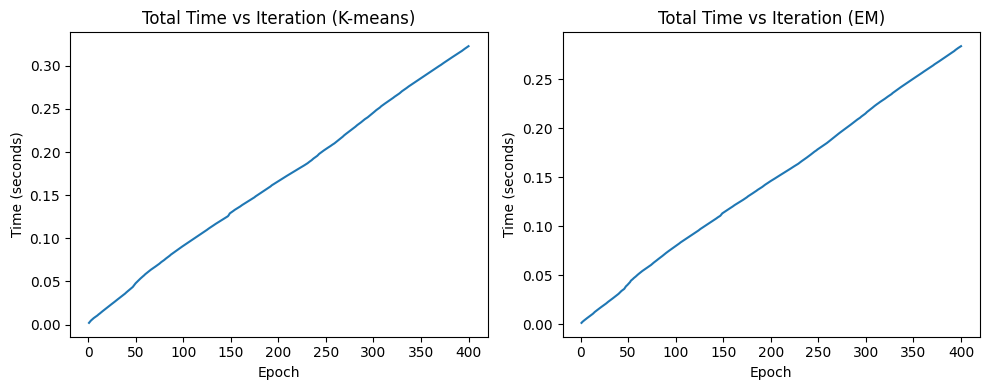

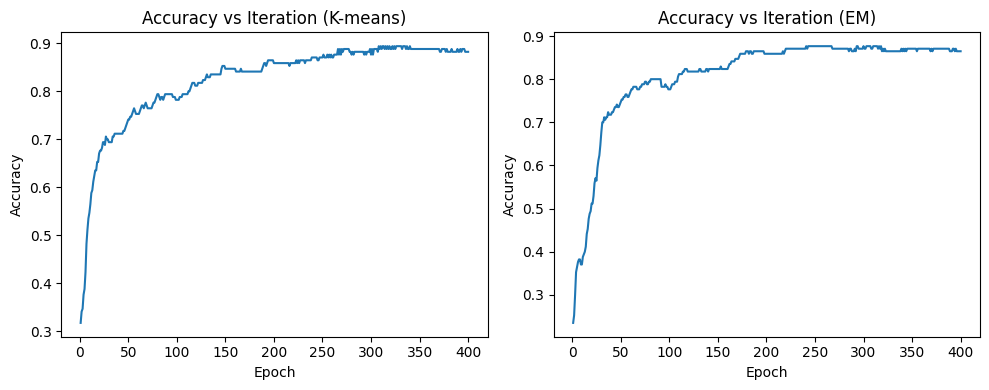

best accuracy for kmeans is  0.8941176470588236
best accuracy for em is  0.8764705882352941


In [67]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import fetch_openml
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import time
import matplotlib.pyplot as plt

# Check for GPU availability
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load the Statlog dataset (replace 'statlog_dataset.csv' with your dataset file)
data = fetch_openml("vehicle")

# Extract the features and labels
X = data.data
y = data.target

# Convert target labels to numeric format
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Perform K-means clustering and EM (Expectation-Maximization) clustering
n_clusters = 12  # Number of clusters for K-means and EM

# Create empty lists to store results
times_kmeans = []
accuracies_kmeans = []
times_em = []
accuracies_em = []

# Define a neural network model
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, num_classes)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Specify the number of classes in your dataset
num_classes = len(np.unique(y))

# Create two neural network models for K-means and EM features
model_kmeans = NeuralNetwork(X_train.shape[1], num_classes).to(device)
model_em = NeuralNetwork(X_train.shape[1], num_classes).to(device)

# Define loss function and optimizer for multi-class classification
criterion = nn.CrossEntropyLoss()
optimizer_kmeans = optim.Adam(model_kmeans.parameters(), lr=0.001,weight_decay=0.0001)
optimizer_em = optim.Adam(model_em.parameters(), lr=0.001,weight_decay= 0.0001)

# Convert NumPy arrays to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
X_test = torch.tensor(X_test, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train, dtype=torch.long).to(device)
y_test = torch.tensor(y_test, dtype=torch.long).to(device)

# Train the models for K-means and EM features
num_epochs = 400
total_time_em = 0.0
total_time_km = 0.0
for epoch in range(num_epochs):
    start_time = time.time()

    model_kmeans.train()
    optimizer_kmeans.zero_grad()
    outputs_kmeans = model_kmeans(X_train)
    loss_kmeans = criterion(outputs_kmeans, y_train)
    loss_kmeans.backward()
    optimizer_kmeans.step()

    end_time = time.time()
    total_time_km += end_time - start_time
    times_kmeans.append(total_time_km)

    model_em.train()
    optimizer_em.zero_grad()
    start_time = time.time()
    outputs_em = model_em(X_train)
    loss_em = criterion(outputs_em, y_train)
    loss_em.backward()
    optimizer_em.step()

    end_time = time.time()
    total_time_em += end_time - start_time
    times_em.append(total_time_em)

    # Evaluate the models on the test data
    model_kmeans.eval()
    model_em.eval()

    with torch.no_grad():
        outputs_kmeans = model_kmeans(X_test)
        predictions_kmeans = torch.argmax(outputs_kmeans, dim=1)
        accuracy_kmeans = accuracy_score(y_test.cpu().numpy(), predictions_kmeans.cpu().numpy())

        outputs_em = model_em(X_test)
        predictions_em = torch.argmax(outputs_em, dim=1)
        accuracy_em = accuracy_score(y_test.cpu().numpy(), predictions_em.cpu().numpy())

        accuracies_kmeans.append(accuracy_kmeans)
        accuracies_em.append(accuracy_em)

# Plot the total time vs iteration
plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.plot(range(1, num_epochs + 1), times_kmeans, label="K-means")
plt.xlabel("Epoch")
plt.ylabel("Time (seconds)")
plt.title("Total Time vs Iteration (K-means)")

plt.subplot(122)
plt.plot(range(1, num_epochs + 1), times_em, label="EM")
plt.xlabel("Epoch")
plt.ylabel("Time (seconds)")
plt.title("Total Time vs Iteration (EM)")

plt.tight_layout()
plt.show()

# Plot the accuracy vs iteration
plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.plot(range(1, num_epochs + 1), accuracies_kmeans, label="K-means")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Iteration (K-means)")

plt.subplot(122)
plt.plot(range(1, num_epochs + 1), accuracies_em, label="EM")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Iteration (EM)")

plt.tight_layout()
plt.show()
print("best accuracy for kmeans is ",max(accuracies_kmeans))
print("best accuracy for em is ",max(accuracies_em))